In [68]:
import csv
import pathlib
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
%matplotlib inline

root_dir = pathlib.Path().absolute().parents[1]
with open(root_dir / "data" / "titanic.csv", "r") as ifile:
    reader = csv.reader(ifile)
    data = [line for line in reader]

In [69]:

column_names = data.pop(0)
titanic_input = pd.DataFrame(data)
titanic_input.columns = column_names

titanic_input['Age'] = titanic_input['Age'].replace("", 999) #null values are overwritten with 999 for further use
titanic_input["Age"] = titanic_input["Age"].astype(float)
titanic_input["Fare"] = titanic_input["Fare"].astype(float)
titanic_input


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,999.0,1,2,W./C. 6607,23.4500,,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


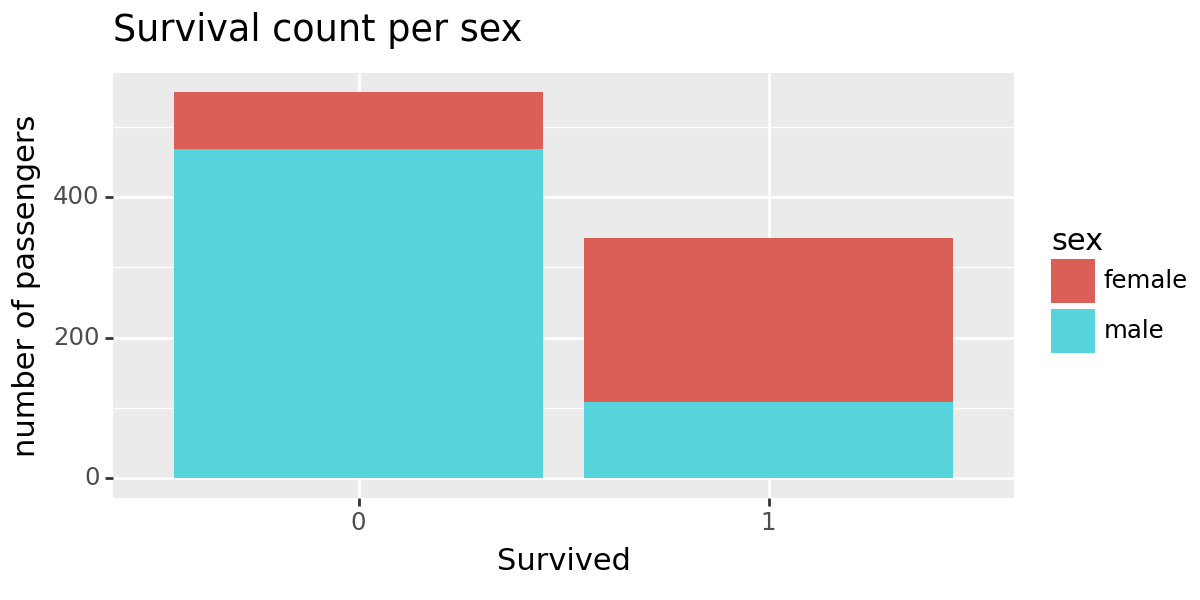

<Figure Size: (600 x 300)>

In [70]:
p9_input = p9.ggplot(data=titanic_input, mapping=p9.aes(x="Survived", fill="factor(Sex)"))
bars = p9.geom_bar()
labels = p9.labs(x = "Survived", y = "number of passengers", title = "Survival count per sex", fill = "sex")
theme_grammer = p9.theme(figure_size=(6,3))
bar_output = p9_input + bars + labels + theme_grammer
bar_output

In this first bar chart we can see that ther number of death is nearly twice as high. Furthermore, it is obvious that there were more male than female on board.

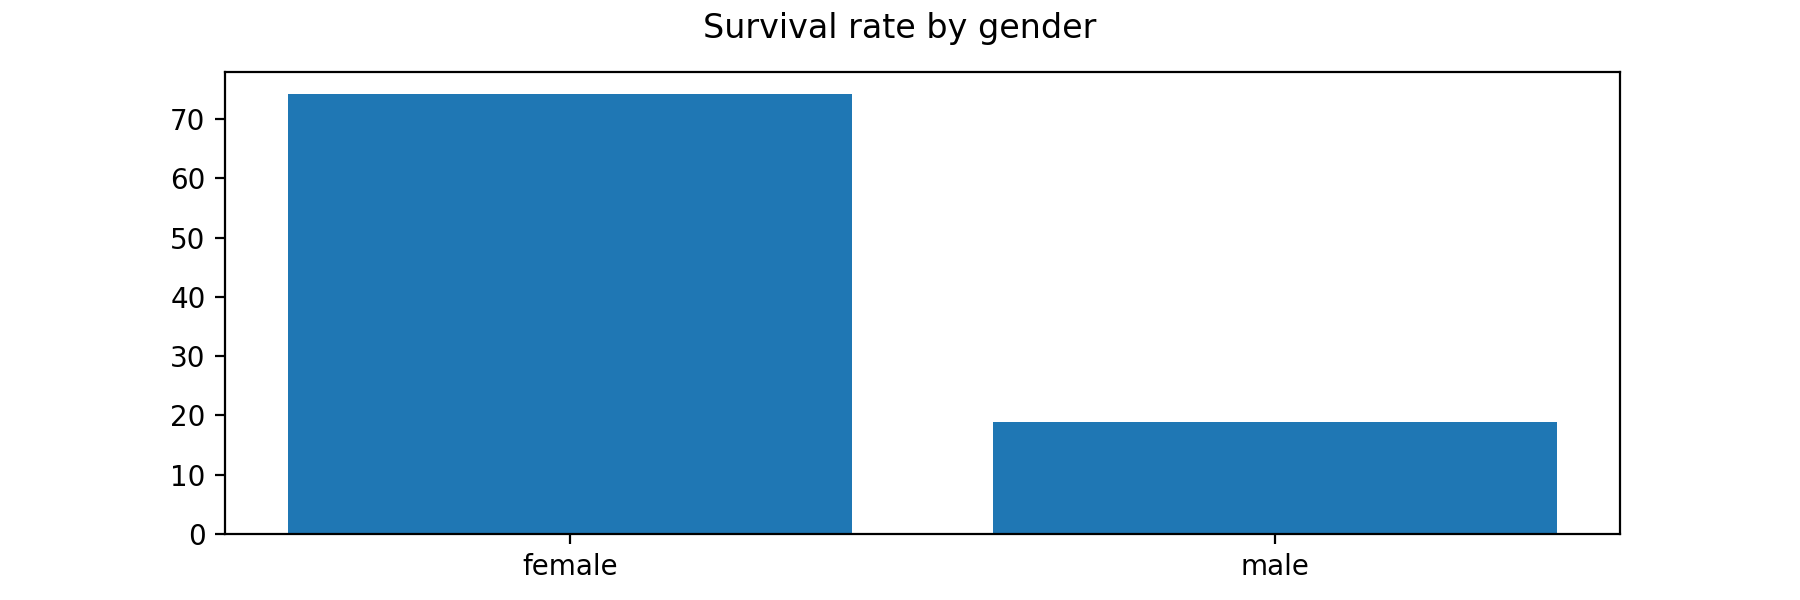

In [71]:

def survival_gender_ratio(survival_status, gender):
    titanic_gender = titanic_input[titanic_input['Sex'] == gender] 
    gender_count = titanic_gender.shape[0]
    titanic_survival_gender = titanic_gender[titanic_gender['Survived'] == survival_status]
    gender_survival_count = titanic_survival_gender.shape[0]
    survival_ratio = (gender_survival_count * 100) / gender_count
    return survival_ratio

female_survival_ratio = survival_gender_ratio("1", "female")
male_survival_ratio = survival_gender_ratio("1", "male")

names = ["female", "male"]
values = [female_survival_ratio, male_survival_ratio]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.suptitle("Survival rate by gender")
plt.show()

In this next chart we take a closer look at the survival rate per gender. Which shows clearly that females were much more likely to survive. At this point one could speculate that it was because females and children were prioritised upon evacuation. To prove this hypothesis concering the higher survival rate in children, we will look at the age groups next.

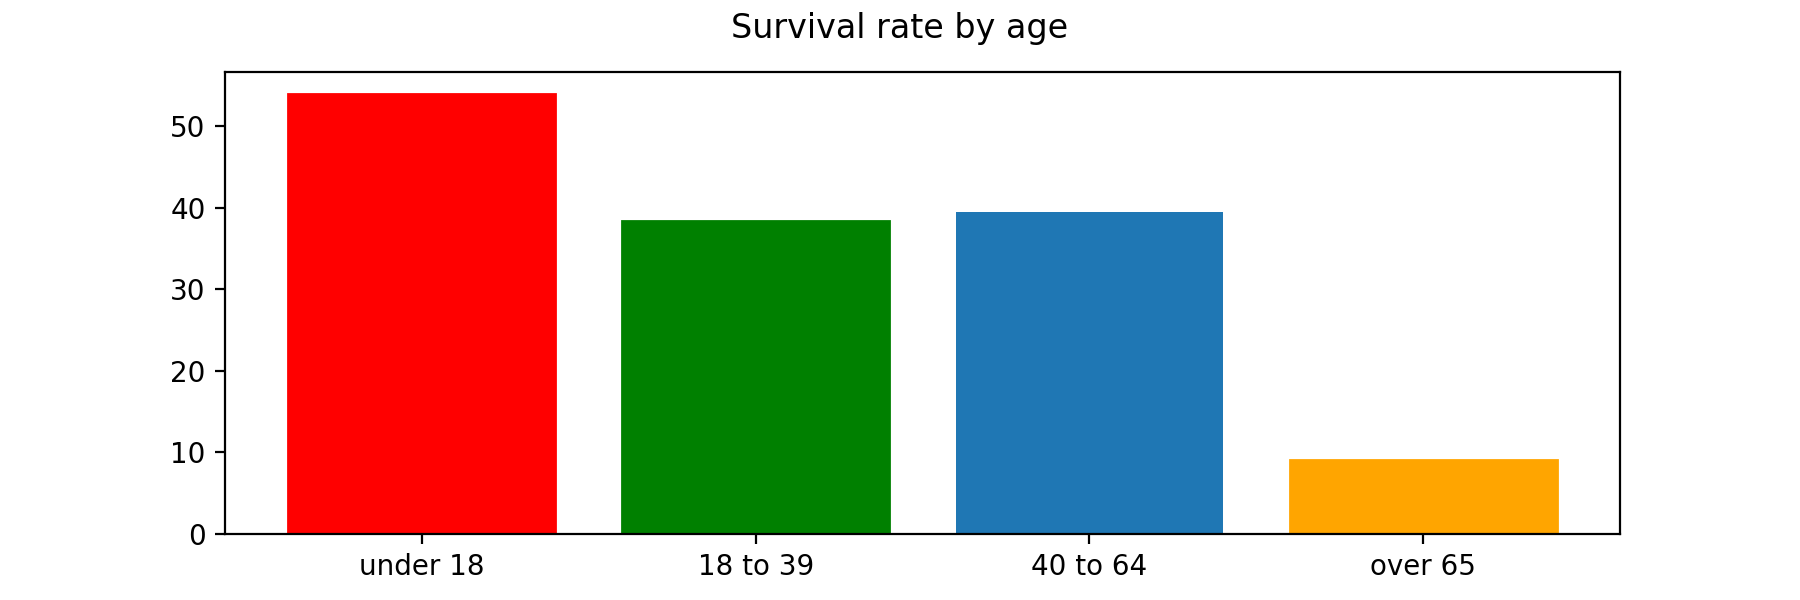

In [72]:

def survival_age_ratio(lower_age_limit, upper_age_limit, survival_status):
    titanic_age_group = titanic_input[titanic_input['Age'] < upper_age_limit] 
    titanic_age_group1 = titanic_age_group[titanic_age_group['Age'] >= lower_age_limit]
    age_group_count = titanic_age_group1.shape[0]
    titanic_age_group_survived = titanic_age_group1[titanic_age_group1['Survived'] == survival_status]
    age_group_survival_count = titanic_age_group_survived.shape[0]
    age_group_ratio = (age_group_survival_count * 100) / age_group_count
    return age_group_ratio

survival_ratio_children = survival_age_ratio(0, 18, "1")
survival_ratio_young_adults = survival_age_ratio(18, 40, "1")
survival_ratio_adults = survival_age_ratio(40, 65, "1")
survival_ratio_retired = survival_age_ratio(65, 120, "1")

names = ["under 18", "18 to 39", "40 to 64", "over 65"]
values = [survival_ratio_children, survival_ratio_young_adults, survival_ratio_adults, survival_ratio_retired]

plt.figure(figsize=(9, 3))

bars = plt.bar(names, values)
bars[0].set_color("red")
bars[1].set_color("green")
bars[3].set_color("orange")
plt.suptitle("Survival rate by age")
plt.show()

When comparing the survival rate by age group, it is made obvious that the children do indeed have the highest survival rate. Another interesting conclusion one could draw from this chart is that since people over 65 have by far the lowest survival rate people that aren't as mobile anymore were more likely to fall victim to the tradgedy or maybe less prioritised upon evacuation.  

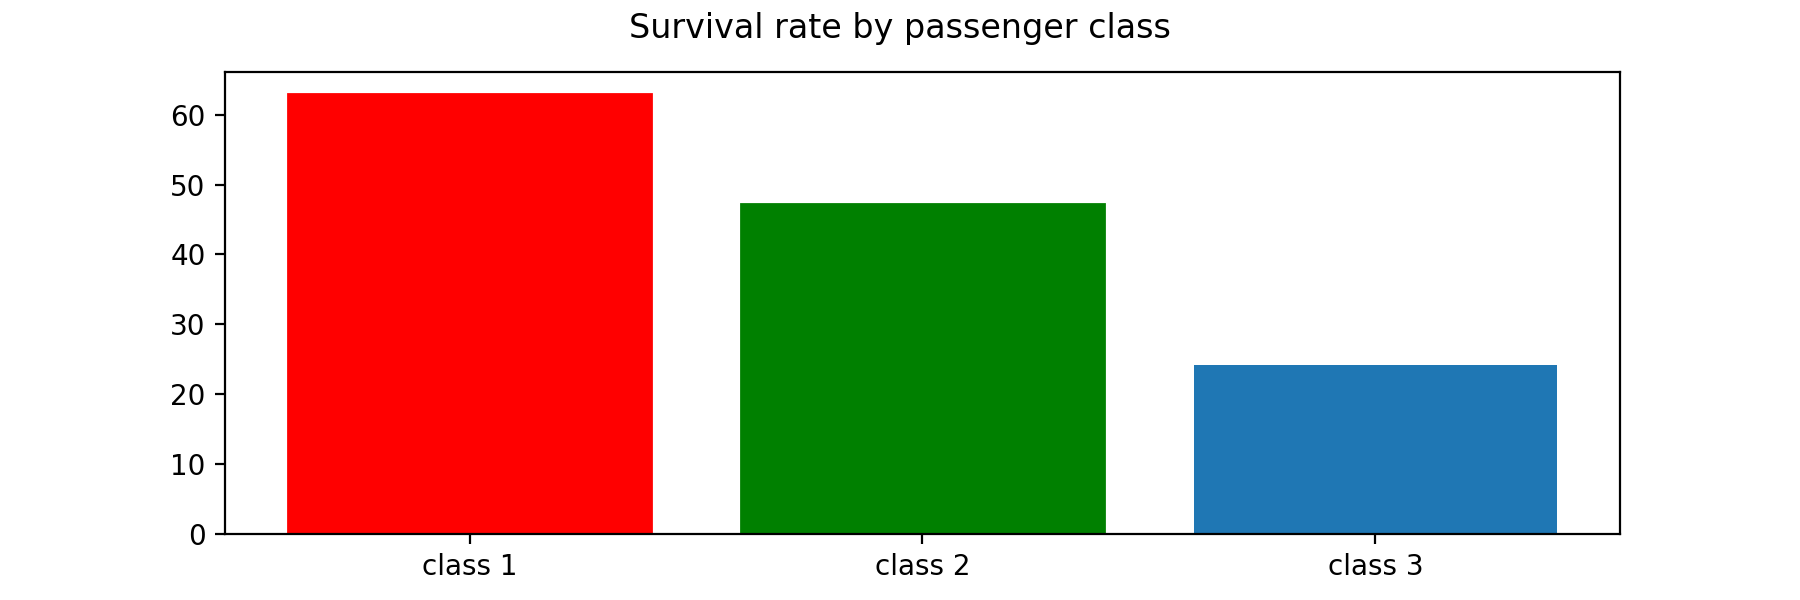

In [73]:
def survival_class_ratio(pclass, survival_status):
    titanic_pclass = titanic_input[titanic_input['Pclass'] == pclass]
    pclass_group_count = titanic_pclass.shape[0]
    titanic_pclass_survived = titanic_pclass[titanic_pclass['Survived'] == survival_status]
    titanic_plcass_survival_count = titanic_pclass_survived.shape[0]
    pclass_survival_ratio = (titanic_plcass_survival_count * 100) / pclass_group_count
    return pclass_survival_ratio

survival_ratio_class1 = survival_class_ratio("1", "1")
survival_ratio_class2 = survival_class_ratio("2", "1")
survival_ratio_class3 = survival_class_ratio("3", "1")

names = ["class 1", "class 2", "class 3"]
values = [survival_ratio_class1, survival_ratio_class2, survival_ratio_class3]

plt.figure(figsize=(9, 3))

bars = plt.bar(names, values)
bars[0].set_color("red")
bars[1].set_color("green")
plt.suptitle("Survival rate by passenger class")
plt.show()

The next thing we took a look at were the survival rates per class. There is a tendency shown that better classes had a better chance of surviving. 

In [76]:
titanic_class1 = titanic_input[titanic_input['Pclass'] == "1"]
median1 = titanic_class1['Fare'].median()

print("Median fare of class 1: %.2f" % median1)

titanic_class2 = titanic_input[titanic_input['Pclass'] == "2"]
median2 = titanic_class2['Fare'].median()

print(f"Median fare of class 2: %.2f" % median2)

titanic_class3 = titanic_input[titanic_input['Pclass'] == "3"]
median3 = titanic_class3['Fare'].median()

print("Median fare of class 3:", median3)

Median fare of class 1: 60.29
Median fare of class 2: 14.25
Median fare of class 3: 8.05


For this final comparison, we took a look at the potential correlation between the fare prices and classes. As clearly shown by the median fare price of each class we were indeed able to conclude that the higher classes were more expensive which in our opinion made a comparison of fare price and survival redundant. 

As for name, Ticket number and boarding gate we decided that any correlation between these and their survival rate is purely random. 
Where as with Siblings, Spouse, Parents and Children count to our minds the correlation is not relevant for possible conclusions.